<a href="https://colab.research.google.com/github/Eehae/CurrencyForecaster/blob/main/Currency_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Install Prophet and Investpy
#call prophet
from fbprophet  import Prophet
#install investpy
!pip install investpy
import investpy

In [31]:
#@title Input
CurrencyCouple = "EUR/KRW" #@param {type:"string"}
StartDate = "01/01/2017" #@param {type:"string"}
EndDate = "15/03/2022" #@param {type:"string"}

#EUR-KRW DATA CALL
df = investpy.currency_crosses.get_currency_cross_historical_data(CurrencyCouple, StartDate, EndDate, as_json=False, order='ascending', interval='Daily')
df = df.reset_index()
df['ds'] = df['Date']
df['y'] = df['Close']
data = df[['ds', 'y']]
PredictionDays =  80#@param {type:"integer"}

In [34]:
#@title Build model
model = Prophet(yearly_seasonality=True,weekly_seasonality=True, daily_seasonality=False)
model.fit(data)
future = model.make_future_dataframe(periods=PredictionDays, freq='D')
forecast = model.predict(future)

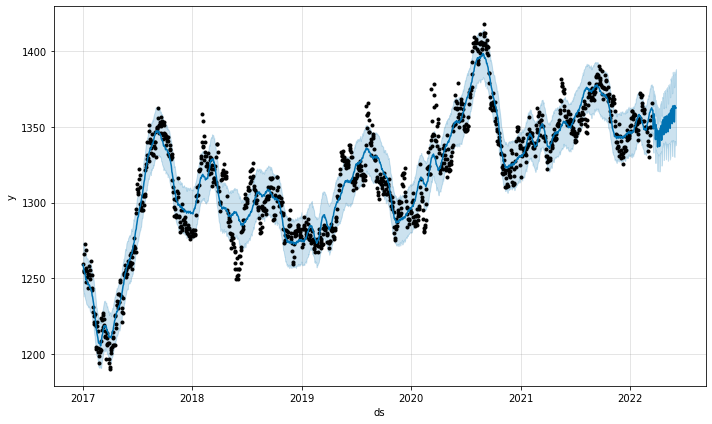

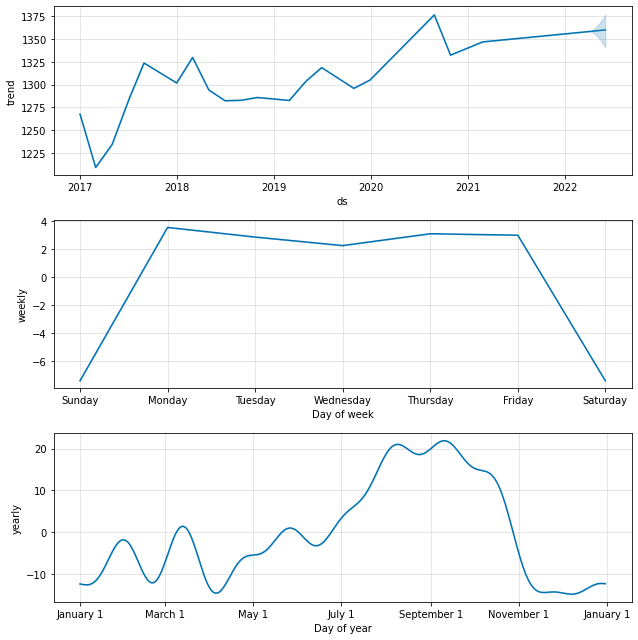

In [35]:
#@title Visualise Forecast
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)